<a href="https://colab.research.google.com/github/decci027/datascience_a2/blob/main/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

You would want to include a polynomial element in a model to capture non-linear relationships between variables, allowing your model to fit complex data patterns that a simple linear model cannot, particularly when the relationship between variables exhibits curves or inflection points; this is especially useful when you need to model smooth transitions or complex trends in data with a single function.


**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

You can fit add polynomial features but if your data is linear then there is a great chance that your model will overfit. So unless you know certainly that your data is not linear , you should use linear models.

**Task3**:

What's the point of using b splines?

B-splines are used to create smooth, flexible curves by fitting data points with a piecewise polynomial function, offering a high degree of control over the curve's shape through "control points" while maintaining local control, meaning changing one control point only affects a small section of the curve, making them valuable in applications like computer-aided design (CAD), computer graphics, and statistical modeling where precise curve fitting is needed without drastic changes to the overall shape

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

The way I think Gaussian Process(GP) is defined is like a smart way to guess a curve when you only have a few points. Instead of picking just one possible curve, it considers many possible curves that could fit the data, giving more confidence to ones that make sense.

It does this by assuming that points close to each other should behave similarly. You can imagine it like drawing a smooth line through dots while allowing for some wiggle room. The cool part is that a GP doesn’t just give a single prediction—it also tells you how certain or uncertain it is about different parts of the curve. That makes it super useful for making predictions while keeping track of uncertainty :).

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


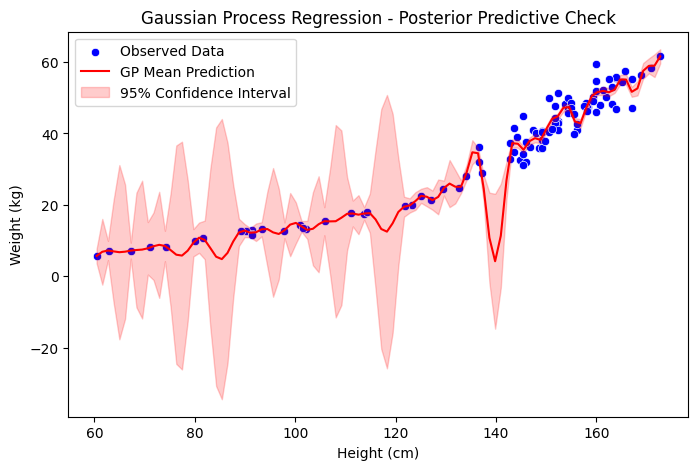

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Load the dataset
howell_data = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

# Extract height and weight for modeling
X = howell_data["height"].values.reshape(-1, 1)
y = howell_data["weight"].values

# Define Gaussian Process kernel (constant + radial basis function kernel for smoothness)
kernel = C(1.0) * RBF(length_scale=20)

# Initialize GP model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1.0)

# Reduce dataset size for faster computation (optional)
sample_data = howell_data.sample(n=100, random_state=42)  # Use a subset for efficiency
X_sample = sample_data["height"].values.reshape(-1, 1)
y_sample = sample_data["weight"].values

# Fit the Gaussian Process model
gp.fit(X_sample, y_sample)

# Generate predictions across a range of heights
X_pred = np.linspace(X_sample.min(), X_sample.max(), 100).reshape(-1, 1)
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Plot posterior predictive check
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sample_data["height"], y=sample_data["weight"], label="Observed Data", color="blue")
plt.plot(X_pred, y_pred, label="GP Mean Prediction", color="red")
plt.fill_between(X_pred.ravel(), y_pred - 2*sigma, y_pred + 2*sigma,
                 color="red", alpha=0.2, label="95% Confidence Interval")

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.title("Gaussian Process Regression - Posterior Predictive Check")
plt.show()


**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

The PyMC example on Mauna Loa CO₂ levels shows how Gaussian Processes (GPs) can be used to model complex data trends. It demonstrates using a Bayesian approach with NUTS (a sampling method) to estimate uncertainties and make predictions. The example also explores how to handle input data that has measurement errors, combine structured and flexible modeling (semiparametric GP), and create custom functions to detect changes in trends over time. Additionally, it uses historical CO₂ data to analyze long-term patterns, showing how GPs can be powerful tools for making sense of real-world, time-dependent data.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

One of the graphs that stood out to me was the PyMC example "Mauna Loa CO₂ continued". It displays historical CO₂ measurements derived from Antarctic ice cores, spanning from 13 AD to 1958. In this graph, each point represents the estimated atmospheric CO₂ concentration for a specific year, as determined from air bubbles trapped in the ice. The graph reveals that for over a millennium, CO₂ levels remained relatively stable at around 280 parts per million (ppm). However, starting around the time of the Industrial Revolution (late 18th to early 19th century), there's a noticeable and sharp increase in CO₂ concentrations, illustrating the significant impact of industrial activities on atmospheric composition.  